In [7]:
!pip install scikit-learn graphviz matplotlib pandas seaborn

In [15]:
import pandas as pd
df = pd.read_csv("/content/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("heart.csv")

# 1. Check for missing values
print("Missing values:\n", df.isnull().sum())

# 2. Check data types and unique values (helps identify categorical features)
print("\nData types:\n", df.dtypes)
print("\nUnique values per column:\n", df.nunique())

# 3. Convert 'thal', 'cp', 'slope', 'restecg', etc. to categorical if needed
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']
df[categorical_cols] = df[categorical_cols].astype('category')

# 4. One-hot encode categorical variables (if needed)
df_encoded = pd.get_dummies(df, drop_first=True)

# 5. Split into features and target
X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]

# 6. Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check final shape
print("\nEncoded Feature Columns:", X.columns.tolist())
print("X_train shape:", X_train.shape)

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Unique values per column:
 age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Encoded Feature Columns: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_1', 'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 

In [17]:
# 1. Age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 40, 55, 70, 100], labels=['Young', 'Middle', 'Senior', 'Old'])

# 2. High cholesterol flag
df['high_chol'] = df['chol'].apply(lambda x: 1 if x > 240 else 0)

# 3. Low heart rate flag
df['low_thalach'] = df['thalach'].apply(lambda x: 1 if x < 100 else 0)

# 4. ST depression risk flag
df['st_depression_risk'] = df['oldpeak'].apply(lambda x: 1 if x > 2 else 0)

# 5. One-hot encode 'cp' (chest pain type)
df = pd.get_dummies(df, columns=['cp'], prefix='cp', drop_first=True)

# 6. Convert categorical columns
categorical_cols = ['sex', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca', 'age_group']
df[categorical_cols] = df[categorical_cols].astype('category')
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Drop any columns you no longer need (optional)
# e.g., drop raw 'age', 'chol', 'thalach', 'oldpeak' if only using engineered features
# df = df.drop(['age', 'chol', 'thalach', 'oldpeak'], axis=1)

# Separate features and label
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preview final features
print("Final features:", X_train.columns.tolist())
print("X_train shape:", X_train.shape)

Final features: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'high_chol', 'low_thalach', 'st_depression_risk', 'cp_1', 'cp_2', 'cp_3', 'sex_1', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'age_group_Middle', 'age_group_Senior', 'age_group_Old']
X_train shape: (820, 28)


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [19]:
# Load dataset (replace with your path)
df = pd.read_csv("heart.csv")

# Basic preprocessing: one-hot encode categorical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']
df[categorical_cols] = df[categorical_cols].astype('category')
df = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
dt = DecisionTreeClassifier(random_state=42, max_depth=3)  # limiting depth for better visualization
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

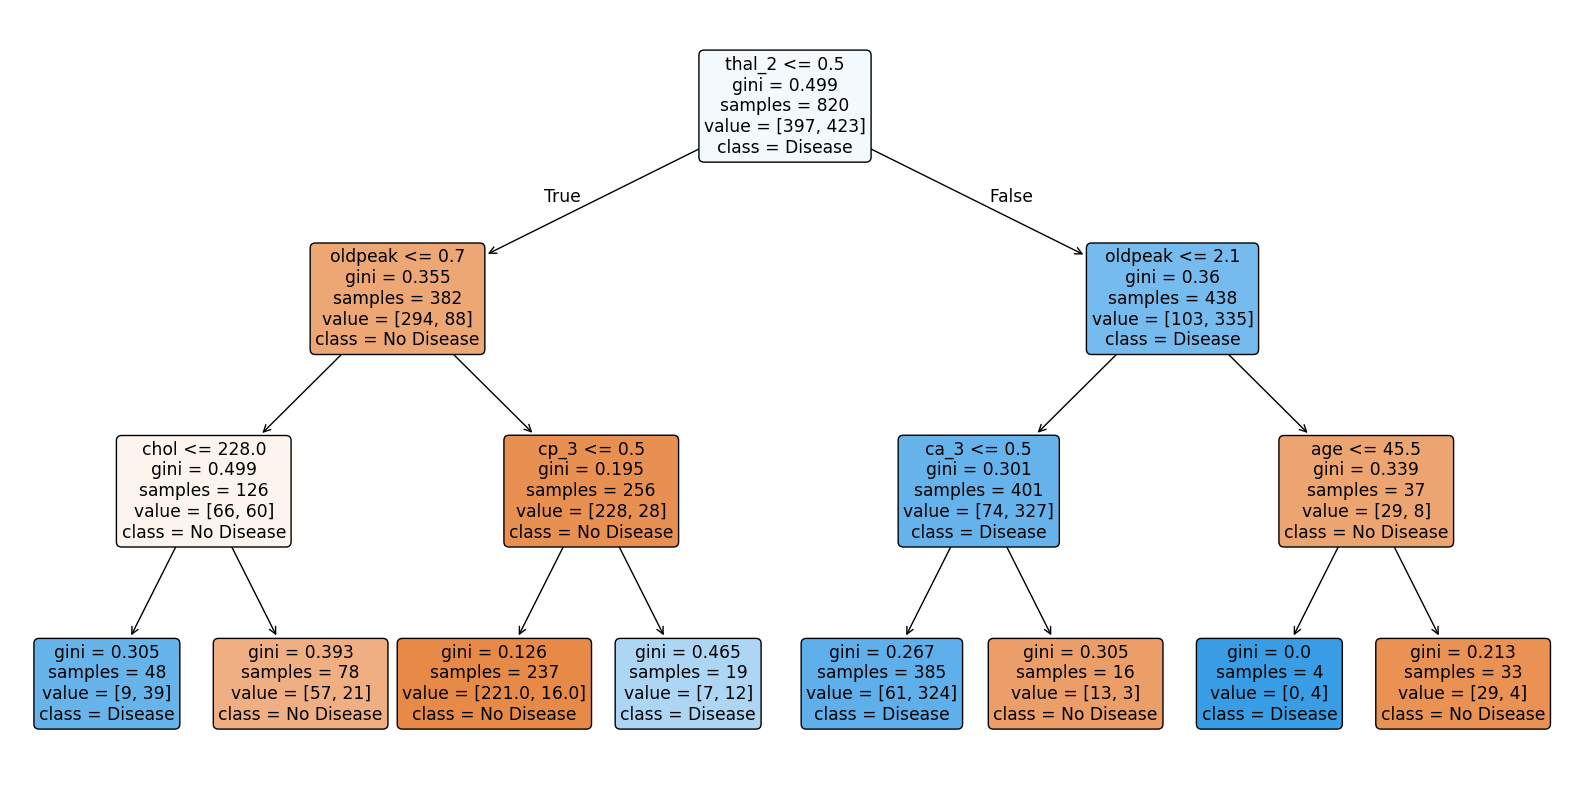

In [21]:
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'], rounded=True)
plt.show()

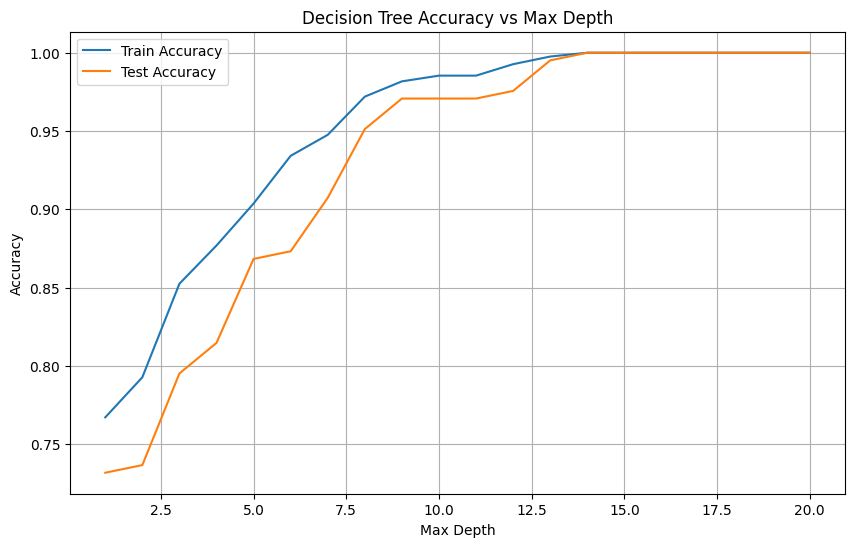

In [22]:
from sklearn.metrics import accuracy_score

max_depths = range(1, 21)
train_accuracies = []
test_accuracies = []

for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)

    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)

    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# Plotting train vs test accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(max_depths, train_accuracies, label='Train Accuracy')
plt.plot(max_depths, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
best_depth = 4
final_dt = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_dt.fit(X_train, y_train)

print(f"Train accuracy: {final_dt.score(X_train, y_train):.3f}")
print(f"Test accuracy: {final_dt.score(X_test, y_test):.3f}")

Train accuracy: 0.877
Test accuracy: 0.815


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [25]:
# Initialize and train the Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)  # 100 trees by default
rf.fit(X_train, y_train)

# Predict on train and test data
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Calculate accuracy
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"Random Forest Train Accuracy: {train_acc_rf:.3f}")
print(f"Random Forest Test Accuracy: {test_acc_rf:.3f}")

Random Forest Train Accuracy: 1.000
Random Forest Test Accuracy: 1.000


In [26]:
# Assuming you have the final Decision Tree named 'final_dt'
train_acc_dt = final_dt.score(X_train, y_train)
test_acc_dt = final_dt.score(X_test, y_test)

print(f"Decision Tree Train Accuracy: {train_acc_dt:.3f}")
print(f"Decision Tree Test Accuracy: {test_acc_dt:.3f}")

Decision Tree Train Accuracy: 0.877
Decision Tree Test Accuracy: 0.815


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# For Decision Tree
importances_dt = final_dt.feature_importances_

# For Random Forest
importances_rf = rf.feature_importances_

In [28]:
# Use feature names
feature_names = X.columns

# Create DataFrame for Decision Tree
feat_imp_dt = pd.DataFrame({'Feature': feature_names, 'Importance': importances_dt})
feat_imp_dt = feat_imp_dt.sort_values(by='Importance', ascending=False)

# Create DataFrame for Random Forest
feat_imp_rf = pd.DataFrame({'Feature': feature_names, 'Importance': importances_rf})
feat_imp_rf = feat_imp_rf.sort_values(by='Importance', ascending=False)

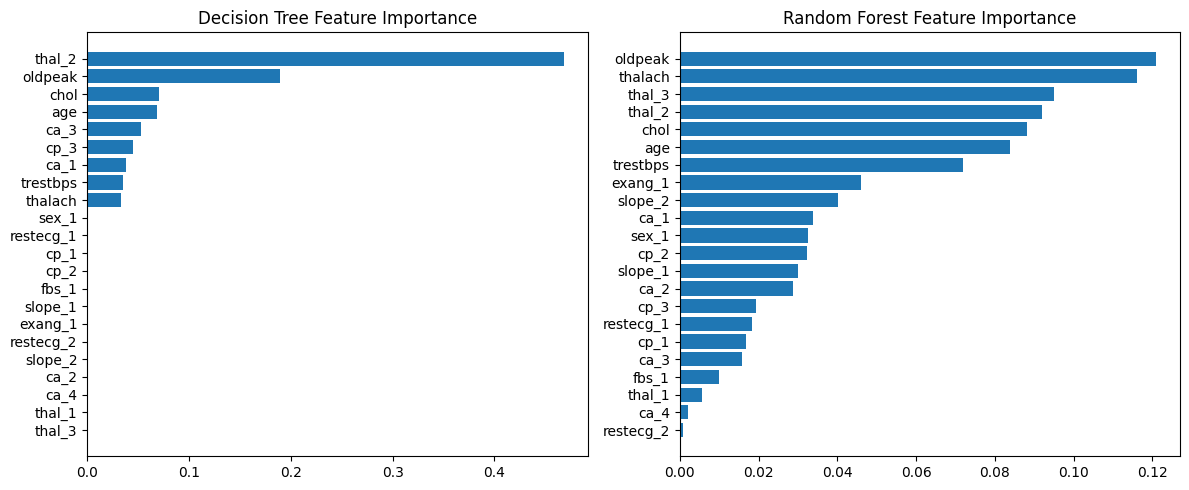

In [29]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.title("Decision Tree Feature Importance")
plt.barh(feat_imp_dt['Feature'], feat_imp_dt['Importance'])
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.title("Random Forest Feature Importance")
plt.barh(feat_imp_rf['Feature'], feat_imp_rf['Importance'])
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [31]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)  # or your best params
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [32]:
dt_cv_scores = cross_val_score(dt, X, y, cv=5, scoring='accuracy')
rf_cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

print(f"Decision Tree CV Accuracy: {dt_cv_scores.mean():.3f} ± {dt_cv_scores.std():.3f}")
print(f"Random Forest CV Accuracy: {rf_cv_scores.mean():.3f} ± {rf_cv_scores.std():.3f}")

Decision Tree CV Accuracy: 0.830 ± 0.009
Random Forest CV Accuracy: 0.988 ± 0.011


In [33]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dt_cv_scores = cross_val_score(dt, X, y, cv=skf, scoring='accuracy')
rf_cv_scores = cross_val_score(rf, X, y, cv=skf, scoring='accuracy')